In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [103]:
data=pd.read_csv(r'C:\Users\kanch\Data Science and Python 28 OCT 2023\Datasets\Bank_Personal_Loan_Modelling.csv')
data


,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan
0,1,25,1,49,91107,4,1.6,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0
4,5,35,8,45,91330,4,1.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0
4997,4998,63,39,24,93023,2,0.3,3,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0


In [104]:
data.loc[data["Personal_Loan"] == 0 ,"Personal_Loan"]="Not_Eligible_for_Loan"
data
data.loc[data["Personal_Loan"] == 1 ,"Personal_Loan"]="Eligible_for_Loan"
data
# To change the records in specific column

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan
0,1,25,1,49,91107,4,1.6,1,0,Not_Eligible_for_Loan
1,2,45,19,34,90089,3,1.5,1,0,Not_Eligible_for_Loan
2,3,39,15,11,94720,1,1.0,1,0,Not_Eligible_for_Loan
3,4,35,9,100,94112,1,2.7,2,0,Not_Eligible_for_Loan
4,5,35,8,45,91330,4,1.0,2,0,Not_Eligible_for_Loan
...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,Not_Eligible_for_Loan
4996,4997,30,4,15,92037,4,0.4,1,85,Not_Eligible_for_Loan
4997,4998,63,39,24,93023,2,0.3,3,0,Not_Eligible_for_Loan
4998,4999,65,40,49,90034,3,0.5,2,0,Not_Eligible_for_Loan


In [107]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan'],
      dtype='object')

In [108]:
data.Personal_Loan.value_counts(normalize=True)

Personal_Loan
Not_Eligible_for_Loan    0.904
Eligible_for_Loan        0.096
Name: proportion, dtype: float64

In [109]:
x=data.drop(columns=["Personal_Loan"])
x

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage
0,1,25,1,49,91107,4,1.6,1,0
1,2,45,19,34,90089,3,1.5,1,0
2,3,39,15,11,94720,1,1.0,1,0
3,4,35,9,100,94112,1,2.7,2,0
4,5,35,8,45,91330,4,1.0,2,0
...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0
4996,4997,30,4,15,92037,4,0.4,1,85
4997,4998,63,39,24,93023,2,0.3,3,0
4998,4999,65,40,49,90034,3,0.5,2,0


In [110]:
y=data[["Personal_Loan"]]
y

,Personal_Loan
0,Not_Eligible_for_Loan
1,Not_Eligible_for_Loan
2,Not_Eligible_for_Loan
3,Not_Eligible_for_Loan
4,Not_Eligible_for_Loan
...,...
4995,Not_Eligible_for_Loan
4996,Not_Eligible_for_Loan
4997,Not_Eligible_for_Loan
4998,Not_Eligible_for_Loan


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             5000 non-null   int64  
 1   Age            5000 non-null   int64  
 2   Experience     5000 non-null   int64  
 3   Income         5000 non-null   int64  
 4   ZIP_Code       5000 non-null   int64  
 5   Family         5000 non-null   int64  
 6   CCAvg          5000 non-null   float64
 7   Education      5000 non-null   int64  
 8   Mortgage       5000 non-null   int64  
 9   Personal_Loan  5000 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 390.8+ KB


## EDA

C:\Users\kanch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


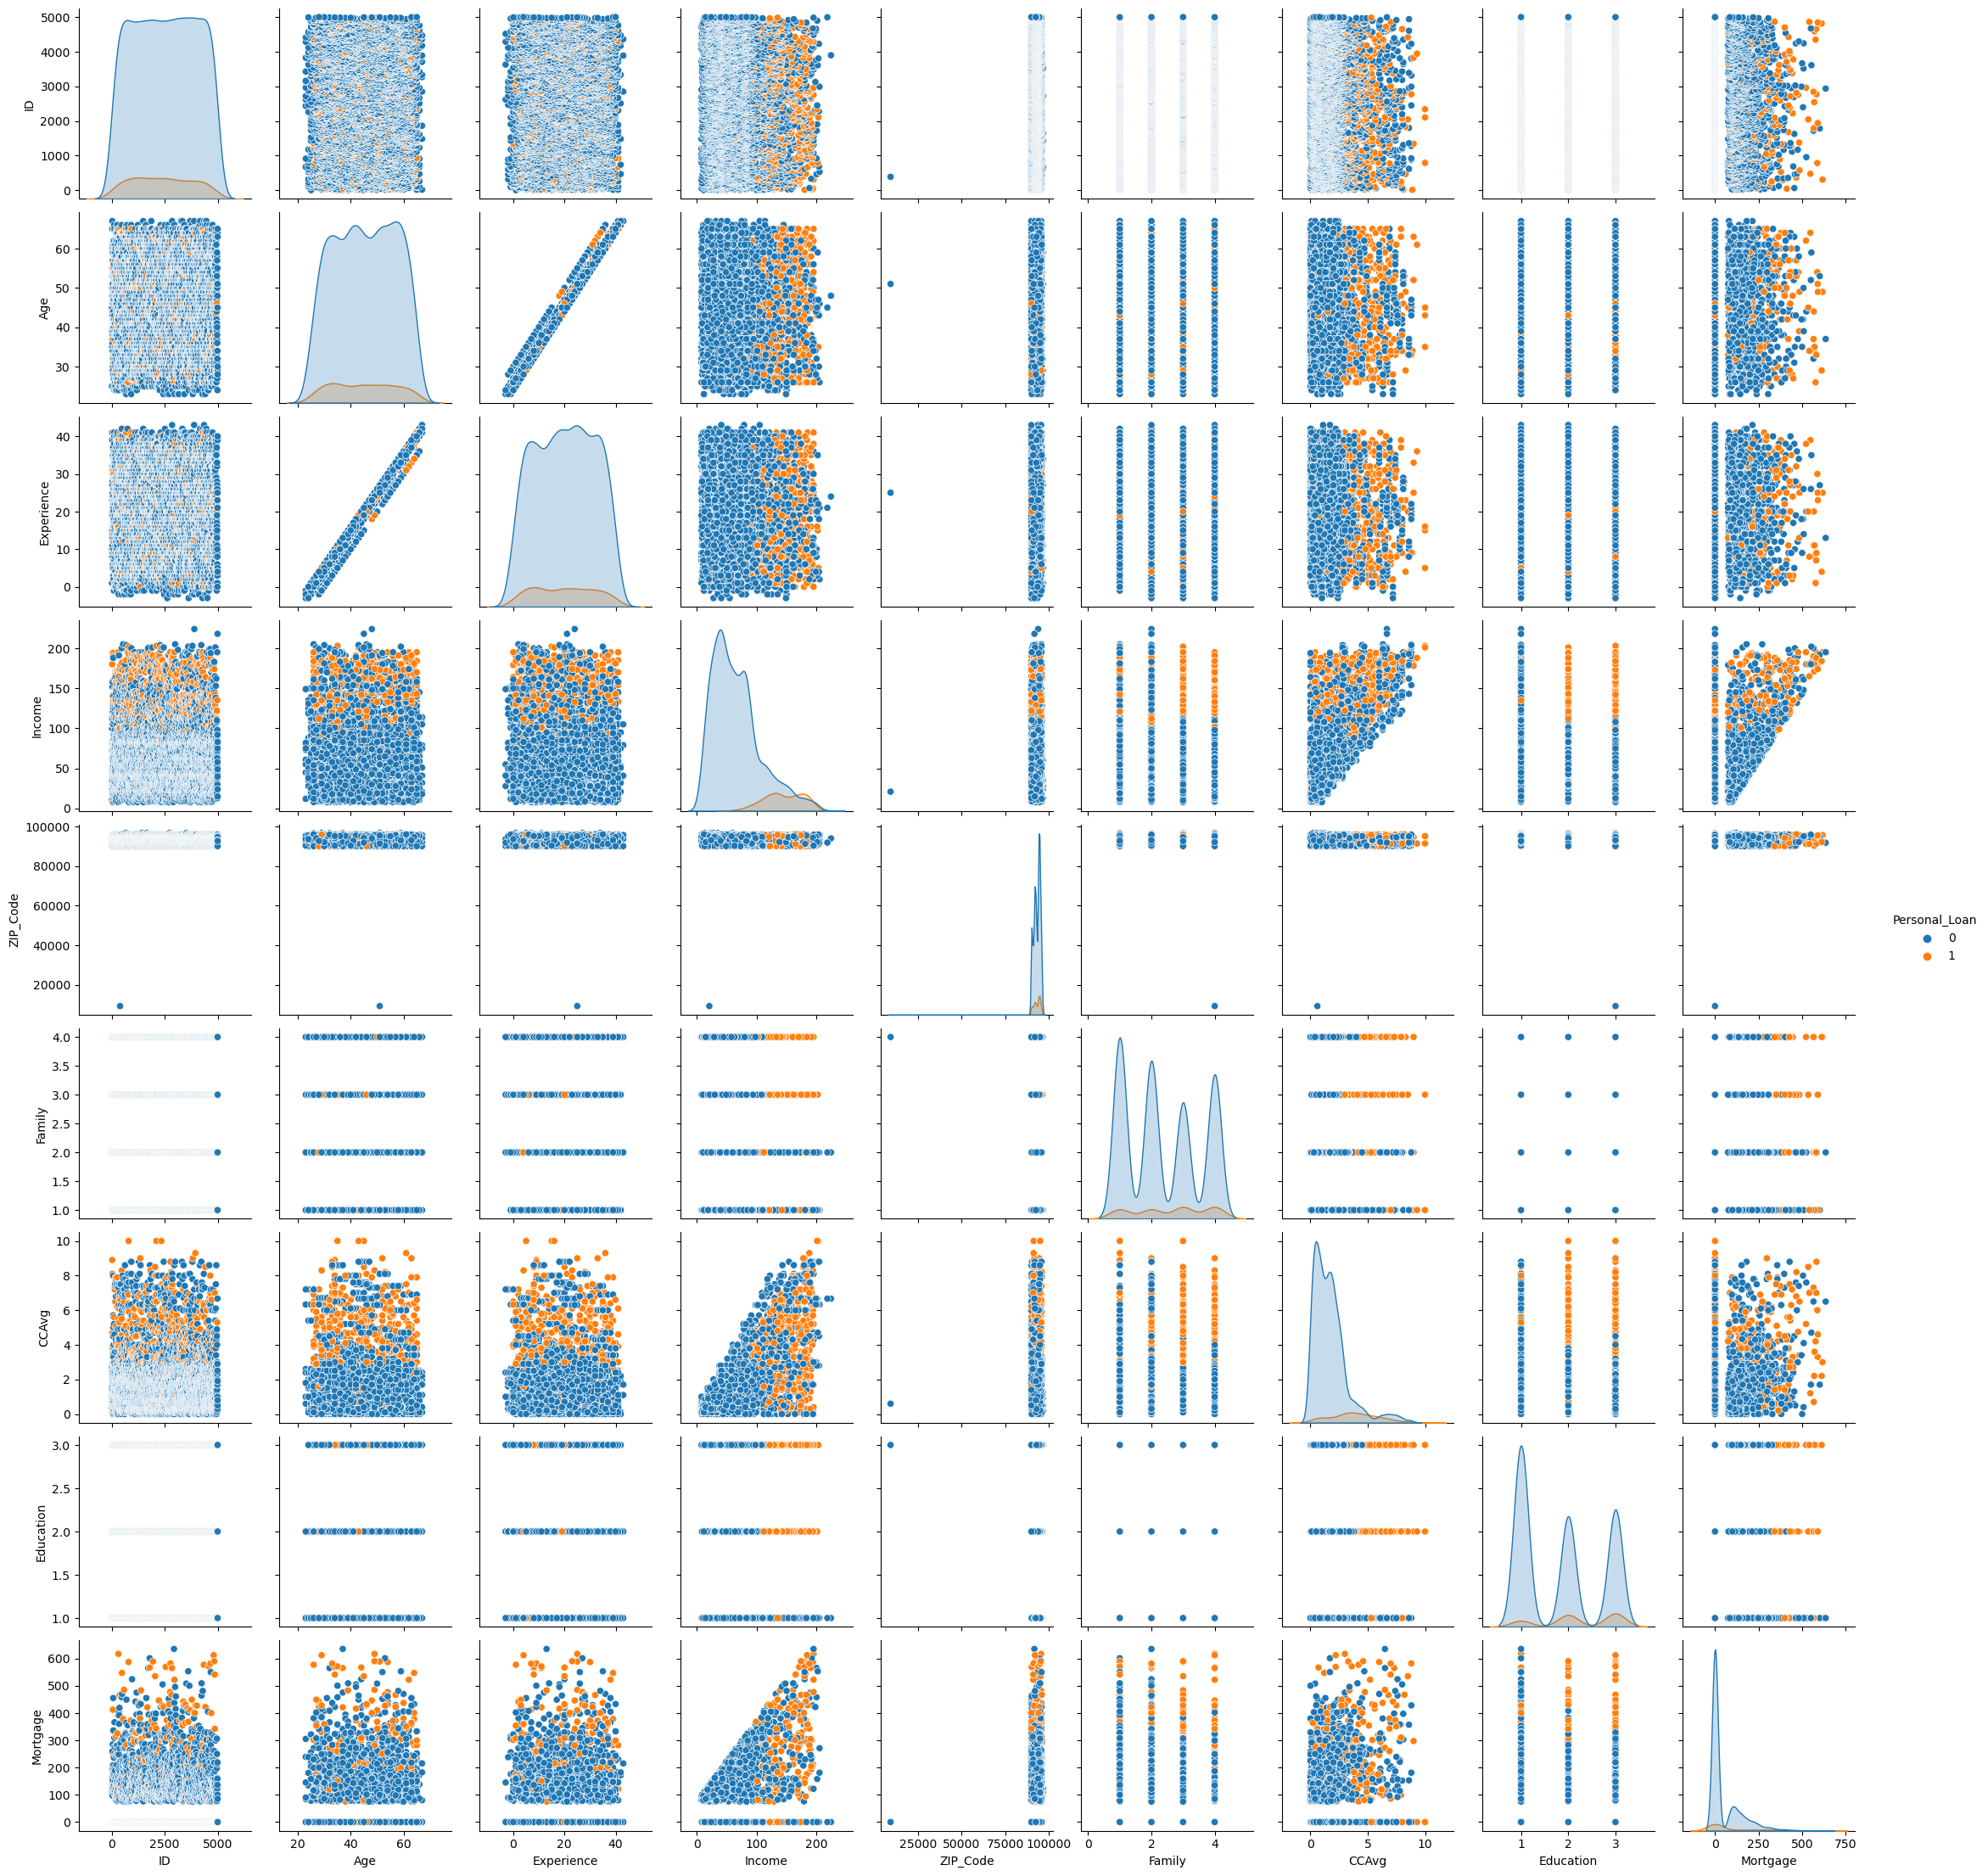

In [15]:
sns.pairplot(data,hue="Personal_Loan")

## Model_Training

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [113]:
LG=LogisticRegression()
print(LG)

LogisticRegression()


In [114]:
LG.fit(x_train,y_train)

C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [115]:
y_pred=LG.predict(x_test)

## Evalution

In [116]:
accuracy_score=metrics.accuracy_score(y_test,y_pred)
accuracy_score

0.8992

In [117]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[  39,   95],
       [  31, 1085]], dtype=int64)

## Jasonify

In [32]:
import pickle

In [35]:
pickle.dump(LG,open('Bank_model.pkl','wb'))

In [38]:
feature_name=x

In [40]:
x

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage
0,1,25,1,49,91107,4,1.6,1,0
1,2,45,19,34,90089,3,1.5,1,0
2,3,39,15,11,94720,1,1.0,1,0
3,4,35,9,100,94112,1,2.7,2,0
4,5,35,8,45,91330,4,1.0,2,0
...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0
4996,4997,30,4,15,92037,4,0.4,1,85
4997,4998,63,39,24,93023,2,0.3,3,0
4998,4999,65,40,49,90034,3,0.5,2,0


In [118]:
LG.coef_

array([[ 9.34593804e-05, -7.24189160e-03, -6.20592163e-03,
        -3.61331028e-02,  6.89064895e-05, -7.16058825e-03,
        -2.88090997e-03, -8.00936466e-03, -1.02462545e-03]])

In [119]:
LG.intercept_

array([3.49149985e-05])

### Manual Inserting Prediction to test

In [120]:
ID=0
Age=25
Experience=1
Income=49
ZIP_Code=91107
Family=4
CCAvg=1.6
Education=1
Mortgage=0

In [121]:
x.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage'],
      dtype='object')

In [122]:
d2=pd.DataFrame(data[['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage']])
d2

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage
0,1,25,1,49,91107,4,1.6,1,0
1,2,45,19,34,90089,3,1.5,1,0
2,3,39,15,11,94720,1,1.0,1,0
3,4,35,9,100,94112,1,2.7,2,0
4,5,35,8,45,91330,4,1.0,2,0
...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0
4996,4997,30,4,15,92037,4,0.4,1,85
4997,4998,63,39,24,93023,2,0.3,3,0
4998,4999,65,40,49,90034,3,0.5,2,0


In [144]:
#User_Input_for_testing_data
ID=10
Age=34
Experience=9
Income=180
ZIP_Code=93023
Family=1
CCAvg=8.9
Education=3
Mortgage=0

In [145]:
result=LG.predict([[ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage]])
result

C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Eligible_for_Loan'], dtype=object)